# Выбор локации для скважины

**Цель проекта**

Проанализировать данные по исследованным месторождениям нефти в трех регионах и построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль, а также проанализировать возможную прибыль и риски добычи в регионах. После оценки рисков рассмотреть лишь те регионы, в которых вероятность убытков составляет меньше 2.5%, и выбрать регион с наибольшей средней прибылью среди них.

**Данные для анализа**

На анализ переданы данные о пробах нефти в трёх регионах с характеристиками для каждой скважины в каждом регионе по качеству нефти и объемам ее запасов. В каждой выборке по каждому из трех регионов по 100 000 местрождений.

**Шаги (план) проекта**

1.  Загрузка и подготовка данных
2.  Обучение и проверка модели
3.  Подготовка к расчёту прибыли
4.  Расчёт прибыли и рисков
5.  Общий вывод

## Загрузка и подготовка данных

Импортируем необходимые библиотеки для работы с данными в текущем проекте.

In [1]:
import pandas as pd # импорт библиотеки pandas
import numpy as np # импорт библиотеки numpy
from sklearn.linear_model import LinearRegression # импорт алгоритма "линейная регрессия" из библиотеки sklearn
from sklearn.metrics import mean_squared_error # импорт функции для расчета MSE
from sklearn.preprocessing import StandardScaler # импорт структуры StandardScaler из библиотеки sklearn для стандартизации данных
from sklearn.preprocessing import Normalizer # импорт структуры Normalizer из библиотеки sklearn для масштабирования данных
from sklearn.model_selection import train_test_split # импорт функции train_test_split из библиотеки sklearn для деления выборки
from numpy.random import RandomState # импорт объекта RandomState() из модуля numpy.random
import sklearn.metrics as metrics # импорт библиотеки metrics
import matplotlib.pyplot as plt # импорт библиотеки matplotlib для построения диаграмм

### Регион 1

Откроем таблицу с данными, выведем первые 10 строк.

In [2]:
# чтение первого файла с данными и сохранение его в переменную df_1
df_1 = pd.read_csv('/datasets/geo_data_0.csv')
# вывод первых 10 строк
df_1.head(10)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


Изучим общую информацию о данных.

In [3]:
df_1.info() # получение общей информации о структуре датафрейма

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Таблица содержит 5 столбцов, 100000 строк.

Переименование столбцов не требуется.

Пропусков в данных нет.

Требуется изменение типов данных float64 на float32 для экономии памяти.

Требуется проверка данных на явные дубликаты.

Требуется анализ данных в колонках на предмет корректности и адекватности.

**Изменение типов данных**

In [4]:
# изменение типов данных
df_1[df_1.select_dtypes(np.float64).columns] = df_1.select_dtypes(np.float64).astype(np.float32)

Проверим корректность изменения типов данных.

In [5]:
df_1.info() # получение общей информации о структуре датафрейма

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float32
 2   f1       100000 non-null  float32
 3   f2       100000 non-null  float32
 4   product  100000 non-null  float32
dtypes: float32(4), object(1)
memory usage: 2.3+ MB


Изменение типов данных проведено корректно.

**Дубликаты**

Проверим данные датафрейма на наличие явных дубликатов.

In [6]:
# подстчет строк - явных дубликатов
df_1.duplicated().sum()

0

Проверим данные датафрейма на наличие неявных дубликатов, удалив id.

In [7]:
# подстчет строк - неявных дубликатов
df_1.drop(['id'], axis=1).duplicated().sum()

0

Неявных дубликатов также нет.

Явных дубликатов нет.

**Адекватность данных**

In [8]:
# вывод статистических данных о числовых колонках датафрейма
df_1.describe().round(2)

,f0,f1,f2,product
count,100000.00,100000.00,100000.00,100000.00
mean,0.50,0.25,2.50,92.50
std,0.87,0.50,3.25,44.29
min,-1.41,-0.85,-12.09,0.00
25%,-0.07,-0.20,0.29,56.50
50%,0.50,0.25,2.52,91.85
75%,1.07,0.70,4.72,128.56
max,2.36,1.34,16.00,185.36


Данные адекватны, значения находятся в диапазонах, соответствующих масштабам. Проанализируем распределение данных внутри диапазонов, построив диаграммы размаха по признакам "f0", "f1", "f2" на одной диаграмме (данные имеют соотносимый масштаб) и "product" на другой диаграмме (масштаб в несколько раз больше).

Text(0, 0.5, 'Values')

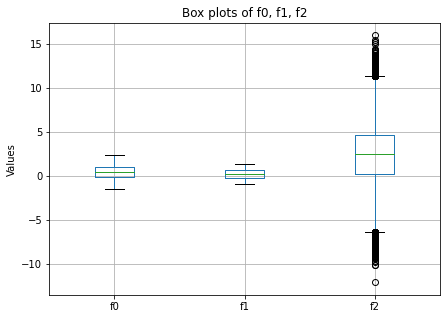

In [9]:
# построение диаграммы размаха по признакам "f0", "f1", "f2"
df_1.boxplot(column=['f0','f1', 'f2'], figsize=(7, 5))
plt.title('Box plots of f0, f1, f2')
plt.ylabel('Values')

Значения признака "f2" имеют много выбросов с обеих сторон "усов", значения признаков "f0" и "f1" существенных выбросов не имеют.

Проверим распределение значений признаков, построив гистограмму.

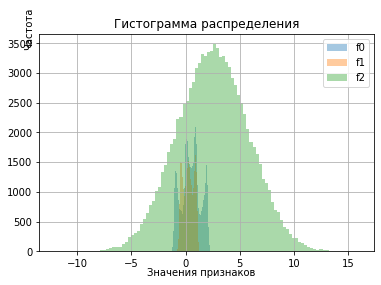

In [10]:
# построение гистограммы для признаков "f0", "f1", "f2"
fig, axes = plt.subplots(sharex=True, sharey=True)
fig.text(0.5, 0.04, 'Значения признаков', ha='center')
fig.text(0.09, 0.9, 'Частота', va='center', rotation='vertical')
plt.title('Гистограмма распределения')
df_1['f0'].hist(alpha = 0.4, bins=100)
df_1['f1'].hist(alpha = 0.4, bins=100)
df_1['f2'].hist(alpha = 0.4, bins=100)
plt.legend(['f0', 'f1', 'f2'])
plt.show()

Значения признака "f2" распределены нормально, значения признаков "f0" и "f1" распределены неравномерно.

Text(0, 0.5, 'Values')

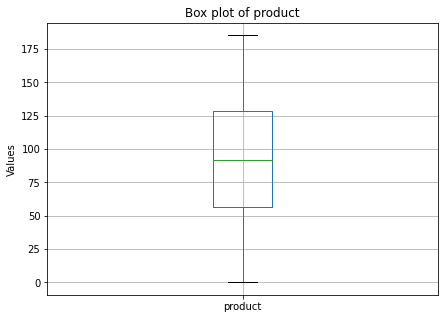

In [11]:
# построение диаграммы размаха по признаку "product"
df_1.boxplot(column='product', figsize=(7, 5))
plt.title('Box plot of product')
plt.ylabel('Values')

Проверим распределение значений признака, построив гистограмму.

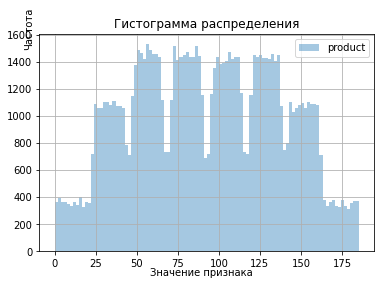

In [12]:
# построение гистограммы для признака "product"
fig, axes = plt.subplots(sharex=True, sharey=True)
fig.text(0.5, 0.04, 'Значение признака', ha='center')
fig.text(0.09, 0.9, 'Частота', va='center', rotation='vertical')
plt.title('Гистограмма распределения')
df_1['product'].hist(alpha = 0.4, bins=100)
plt.legend(['product'])
plt.show()

Значения признака "product" распределены неравномерно.

### Регион 2

In [13]:
# чтение второго файла с данными и сохранение его в переменную df_2
df_2 = pd.read_csv('/datasets/geo_data_1.csv')
# вывод первых 10 строк
df_2.head(10)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


Изучим общую информацию о данных.

In [14]:
df_2.info() # получение общей информации о структуре датафрейма

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Таблица содержит 5 столбцов, 100000 строк.

Переименование столбцов не требуется.

Пропусков в данных нет.

Требуется изменение типов данных float64 на floa32 для экономии памяти.

Требуется проверка данных на явные дубликаты.

Требуется анализ данных в колонках на предмет корректности и адекватности.

**Изменение типов данных**

In [15]:
# изменение типов данных
df_2[df_2.select_dtypes(np.float64).columns] = df_2.select_dtypes(np.float64).astype(np.float32)

Проверим корректность изменения типов данных.

In [16]:
df_2.info() # получение общей информации о структуре датафрейма

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float32
 2   f1       100000 non-null  float32
 3   f2       100000 non-null  float32
 4   product  100000 non-null  float32
dtypes: float32(4), object(1)
memory usage: 2.3+ MB


Изменение типов данных проведено корректно.

**Дубликаты**

Проверим данные датафрейма на наличие явных дубликатов.

In [17]:
# подстчет строк - явных дубликатов
df_2.duplicated().sum()

0

Явных дубликатов нет.

Проверим данные датафрейма на наличие неявных дубликатов, удалив id.

In [18]:
# подстчет строк - неявных дубликатов
df_2.drop(['id'], axis=1).duplicated().sum()

0

Неявных дубликатов также нет.

**Адекватность данных**

In [19]:
# вывод статистических данных о числовых колонках датафрейма
df_2.describe().round(2)

,f0,f1,f2,product
count,100000.00,100000.00,100000.00,100000.00
mean,1.14,-4.80,2.49,68.82
std,8.97,5.12,1.70,45.94
min,-31.61,-26.36,-0.02,0.00
25%,-6.30,-8.27,1.00,26.95
50%,1.15,-4.81,2.01,57.09
75%,8.62,-1.33,4.00,107.81
max,29.42,18.73,5.02,137.95


Данные адекватны, значения находятся в диапазонах, соответствующих масштабам. Проанализируем распределение данных внутри диапазонов, построив диаграммы размаха по признакам "f0", "f1", "f2" на одной диаграмме (данные имеют соотносимый масштаб) и "product" на другой диаграмме (масштаб в несколько раз больше).

Text(0, 0.5, 'Values')

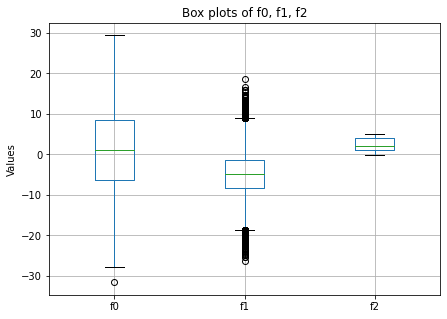

In [20]:
# построение диаграммы размаха по признакам "f0", "f1", "f2"
df_2.boxplot(column=['f0','f1', 'f2'], figsize=(7, 5))
plt.title('Box plots of f0, f1, f2')
plt.ylabel('Values')

Значение признака "f1" имеют много выбросов с обеих сторон "усов", значения признаков "f0" и "f2" существенных выбросов не имеют.

Проверим распределение значений признаков, построив гистограмму.

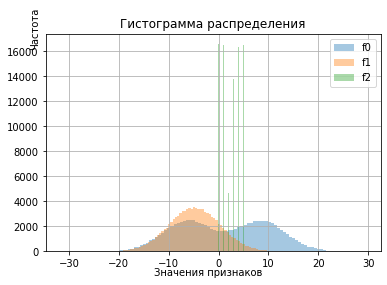

In [21]:
# построение гистограммы для признаков "f0", "f1", "f2"
fig, axes = plt.subplots(sharex=True, sharey=True)
fig.text(0.5, 0.04, 'Значения признаков', ha='center')
fig.text(0.09, 0.9, 'Частота', va='center', rotation='vertical')
plt.title('Гистограмма распределения')
df_2['f0'].hist(alpha = 0.4, bins=100)
df_2['f1'].hist(alpha = 0.4, bins=100)
df_2['f2'].hist(alpha = 0.4, bins=100)
plt.legend(['f0', 'f1', 'f2'])
plt.show()

Значения признака "f1" распределены нормально, значения признаков "f0" и "f1" распределены неравномерно.

Text(0, 0.5, 'Values')

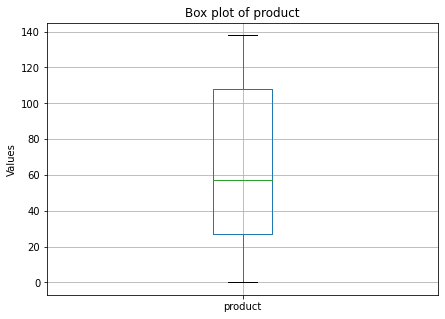

In [22]:
# построение диаграммы размаха по признаку "product"
df_2.boxplot(column='product', figsize=(7, 5))
plt.title('Box plot of product')
plt.ylabel('Values')

Проверим распределение значений признака, построив гистограмму.

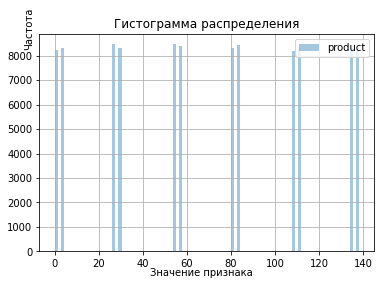

In [23]:
# построение гистограммы для признака "product"
fig, axes = plt.subplots(sharex=True, sharey=True)
fig.text(0.5, 0.04, 'Значение признака', ha='center')
fig.text(0.09, 0.9, 'Частота', va='center', rotation='vertical')
plt.title('Гистограмма распределения')
df_2['product'].hist(alpha = 0.4, bins=100)
plt.legend(['product'])
plt.show()

Значения признака "product" распределены неравномерно.

### Регион 3

Откроем датасет по третьему региону и проанализируем данные в нем.

In [24]:
# чтение третьего файла с данными и сохранение его в переменную df_3
df_3 = pd.read_csv('/datasets/geo_data_2.csv')
# вывод первых 10 строк
df_3.head(10)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


Напишем функцию, включающую все этапы исследования датасета, и применим ее к датасету по Региону 3.

In [25]:
# создание функции
def data_analysis(df):
    # вывод общей информации о датасете
    df.info() 
    
    # изменение типа данных
    df[df.select_dtypes(np.float64).columns] = df.select_dtypes(np.float64).astype(np.float32) 
    # проверка корректности изменения
    df.info() 
    
    # проверка на явные дубликаты
    print(df.duplicated().sum()) 
    # проверка на наявные дубликаты
    print(df.drop(['id'], axis=1).duplicated().sum()) 
    
    # вывод статистической информации о датасете
    print(df.describe().round(2)) 
    
    # построение диаграмм размаха по признакам 'f0','f1', 'f2'
    df.boxplot(column=['f0','f1', 'f2'], figsize=(7, 5)) 
    plt.title('Box plots of f0, f1, f2')
    plt.ylabel('Values')
    plt.show()
    
    # построение гистограммы по признакам 'f0','f1', 'f2'
    fig, axes = plt.subplots(sharex=True, sharey=True) 
    fig.text(0.5, 0.04, 'Значения признаков', ha='center')
    fig.text(0.09, 0.9, 'Частота', va='center', rotation='vertical')
    plt.title('Гистограмма распределения')
    df['f0'].hist(alpha = 0.4, bins=100)
    df['f1'].hist(alpha = 0.4, bins=100)
    df['f2'].hist(alpha = 0.4, bins=100)
    plt.legend(['f0', 'f1', 'f2'])
    plt.show()
    
    # построение диаграммы размаха по признаку 'product'
    df.boxplot(column='product', figsize=(7, 5)) 
    plt.title('Box plot of product')
    plt.ylabel('Values')
    plt.show()
    
    # построение гистограммы по признаку 'product'
    fig, axes = plt.subplots(sharex=True, sharey=True) 
    fig.text(0.5, 0.04, 'Значение признака', ha='center')
    fig.text(0.09, 0.9, 'Частота', va='center', rotation='vertical')
    plt.title('Гистограмма распределения')
    df['product'].hist(alpha = 0.4, bins=100)
    plt.legend(['product'])
    plt.show()

Применим функцию к датасету по региону 3.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float32
 2   f1       100000 non-null  float32
 3   f2       100000 non-null  float32
 4   product  100000 non-null  float32
dtypes: float32(4), object(1)
memory usage: 2.3+ MB
0
0
              f0         f1         f2    product
count  100000.00  100000.00  100000.00  100000.00
mean        0.00      -0.00 

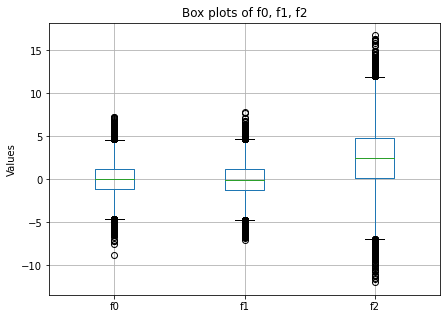

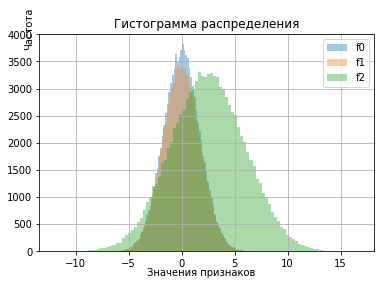

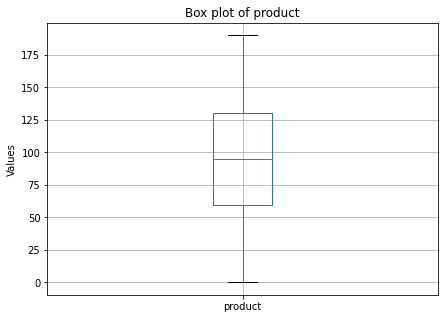

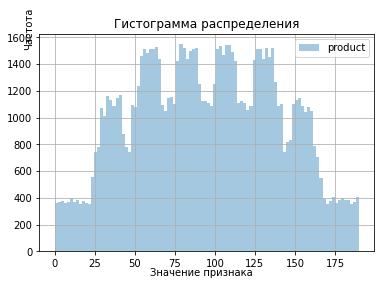

In [26]:
# применение функции
data_analysis(df_3)

**Результаты анализа датасета по Региону 3**

Таблица содержит 5 столбцов, 100000 строк.

Переименование столбцов не требуется.

Пропусков в данных нет.

Изменен тип данных float64 на float32 для экономии памяти.

Данные проверены на наличие явных и неявных дубликатов; дубликатов нет.

Данные в колонках проверены на предмет корректности и адекватности:

* Данные адекватны, значения находятся в диапазонах, соответствующих масштабам.
* Значения признаков "f0", "f1" и "f2" имеют много выбросов с обеих сторон "усов", распределены нормально.
* Значения признака "product" не имеют явных выбросов, распределены неравномерно.


<div style="border:solid blue 2px; padding: 20px">
    
 > **Вывод**  

 > Таблицы открыты, данные адекватны.
    
 > Выборки содержат по 100 000 записей, пропусков и явных дубликатов нет.
    
 > Для экономии памяти произведено изменение типов данных float64 на float32.
    
 > Значения признаков в трех регионах распределены неодинаково:
 > 1. регион 1: 
    Значения признака "f2" имеют много выбросов с обеих сторон "усов", значения признаков "f0" и "f1" существенных выбросов не имеют.
Значения признака "f2" распределены нормально, значения признаков "f0" и "f1" распределены неравномерно.
Значения признака "product" распределены неравномерно, существенных выбросов нет.
 > 2. регион 2: 
    Значение признака "f1" имеют много выбросов с обеих сторон "усов", значения признаков "f0" и "f2" существенных выбросов не имеют.
Значения признака "f1" распределены нормально, значения признаков "f0" и "f1" распределены неравномерно.
Значения признака "product" распределены неравномерно, существенных выбросов нет.
 > 3. регион 3: 
    Значения признаков "f0", "f1" и "f2" имеют много выбросов с обеих сторон "усов", распределены нормально.
Значения признака "product" не имеют явных выбросов, распределены неравномерно.
      
 > Значения адекватны, находятся в пределах диапазонов.
    
<div>

## Обучение и проверка модели

Обучим и проверим модель для каждого региона, сравним предсказания запасов сырья с правильными ответами и оценим RMSE модели.

Установим RandomState равным 12345.

In [27]:
# фиксирование RandomState
state = np.random.RandomState(12345)

Создадим функции для обработки датасетов по регионам: для подготовки признаков и обучения модели.

In [28]:
# создание функции для подготовки признаков
def features_prepare(df):
    
    # разделение выборки на обучающую и валидационную в соотношении 75:25
    df_train, df_valid = train_test_split(df, test_size=0.25, random_state=state)
    
    # создание переменных с признаками (features) и целевым признаком (target)
    features_train = df_train.drop(['product', 'id'], axis=1)
    target_train = df_train['product']
    features_valid = df_valid.drop(['product', 'id'], axis=1)
    target_valid = df_valid['product']
    
    # приведение признаков к одному масштабу с помощью стандартизации данных
    pd.options.mode.chained_assignment = None
    numeric=['f0', 'f1', 'f2']
    scaler = StandardScaler()
    scaler.fit(features_train[numeric]) 
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])
    
    return df_valid, features_train, target_train, features_valid, target_valid

In [29]:
# создание функции для обучения модели
def model_train(features_train, target_train, features_valid, target_valid):
          
    # обучение модели линейной регрессии и предсказание на валидационной выборке
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    return predictions

### Регион 1

Обработаем первый датасет.

**Выделим обучающие и валидационные признаки и целевой признак** с помощью созданной выше функции.

In [30]:
# вывод полученных признаков и целевых признаков обучающей и валидационной выборок
df_1_valid, features_1_train, target_1_train, features_1_valid, target_1_valid = features_prepare(df_1)

**Обучим модель**, сделаем предсказание и **добавим в датасет колонку с предсказаниями** с помощью второй функции.

In [31]:
# добавление в датасет с валидационной выборкой колонки с предсказанием
df_1_valid['predict'] = model_train(features_1_train, target_1_train, features_1_valid, target_1_valid)

**Переиндексируем получившуюся выборку** для удобства дальнейшей работы.

In [32]:
# переиндексация и вывод результата
df_1_valid = df_1_valid.reset_index(drop=True)
df_1_valid.head()

,id,f0,f1,f2,product,predict
0,7Z2gx,0.948970,-0.057547,2.095727,10.038645,95.894958
1,b2HU8,0.992974,0.206671,-0.142278,114.551491,77.572586
2,Y0dXD,1.199854,-0.563356,-1.852991,132.603638,77.892639
3,Mje59,0.691422,-0.433347,0.564974,169.072128,90.175133
4,yqXxU,0.420772,0.972638,0.736190,122.325180,70.510086


**Оценим результаты работы модели** на валидационной выборке.

In [33]:
# вывод итогов: реальные средние запасы сырья, предсказанные запасы сырья, RMSE модели.
print('Регион 1')
print('Средний запас сырья реальный:', df_1_valid['product'].mean().round(2))
print('Средний запас сырья предсказанный:', df_1_valid['predict'].mean().round(2))
print('RMSE:', (mean_squared_error(target_1_valid, df_1_valid['predict']) ** 0.5).round(2))

Регион 1
Средний запас сырья реальный: 92.08
Средний запас сырья предсказанный: 92.59
RMSE: 37.58


### Регион 2

Обработаем второй датасет.

**Выделим обучающие и валидационные признаки и целевой признак** с помощью созданной выше функции.

In [34]:
# вывод полученных признаков и целевых признаков обучающей и валидационной выборок
df_2_valid, features_2_train, target_2_train, features_2_valid, target_2_valid = features_prepare(df_2)

**Обучим модель**, сделаем предсказание и **добавим в датасет колонку с предсказаниями** с помощью второй функции.

In [35]:
# добавление в датасет с валидационной выборкой колонки с предсказанием
df_2_valid['predict'] = model_train(features_2_train, target_2_train, features_2_valid, target_2_valid)

**Переиндексируем получившуюся выборку** для удобства дальнейшей работы.

In [36]:
# переиндексация и вывод результата
df_2_valid = df_2_valid.reset_index(drop=True)
df_2_valid.head()

,id,f0,f1,f2,product,predict
0,ElrxD,8.029941,0.142761,1.994370,53.906521,54.238152
1,zgfBu,-6.032070,-3.118156,2.991338,84.038887,83.217873
2,SkOBP,-6.180053,-7.242396,0.009788,3.179103,2.971466
3,xNTXq,19.401134,-9.446095,0.997003,26.953260,25.916481
4,MBKBZ,-11.330059,-10.721972,4.000191,110.992149,111.341125


**Оценим результаты работы модели** на валидационной выборке.

In [37]:
# вывод итогов: реальные средние запасы сырья, предсказанные запасы сырья, RMSE модели.
print('Регион 2')
print('Средний запас сырья реальный:', df_2_valid['product'].mean().round(2))
print('Средний запас сырья предсказанный:', df_2_valid['predict'].mean().round(2))
print('RMSE:', (mean_squared_error(target_2_valid, df_2_valid['predict']) ** 0.5).round(2))

Регион 2
Средний запас сырья реальный: 68.77
Средний запас сырья предсказанный: 68.77
RMSE: 0.89


### Регион 3

Обработаем третий датасет.

**Выделим обучающие и валидационные признаки и целевой признак** с помощью созданной выше функции.

In [38]:
# вывод полученных признаков и целевых признаков обучающей и валидационной выборок
df_3_valid, features_3_train, target_3_train, features_3_valid, target_3_valid = features_prepare(df_3)

**Обучим модель**, сделаем предсказание и **добавим в датасет колонку с предсказаниями** с помощью второй функции.

In [39]:
# добавление в датасет с валидационной выборкой колонки с предсказанием
df_3_valid['predict'] = model_train(features_3_train, target_3_train, features_3_valid, target_3_valid)

**Переиндексируем получившуюся выборку** для удобства дальнейшей работы.

In [40]:
# переиндексация и вывод результата
df_3_valid = df_3_valid.reset_index(drop=True)
df_3_valid.head()

,id,f0,f1,f2,product,predict
0,27k9G,0.071381,0.053595,5.548406,52.610855,112.561890
1,BXc4A,1.103934,2.408835,-1.945280,52.273441,69.464073
2,u56DZ,0.983287,0.338086,-1.896587,71.340469,69.866226
3,bITk7,3.617945,5.317369,5.242931,162.937912,110.331062
4,TEUoB,-2.139805,0.276569,2.485220,155.371552,95.123291


**Оценим результаты работы модели** на валидационной выборке.

In [41]:
# вывод итогов: реальные средние запасы сырья, предсказанные запасы сырья, RMSE модели.
print('Регион 3')
print('Средний запас сырья реальный:', df_3_valid['product'].mean().round(2))
print('Средний запас сырья предсказанный:', df_3_valid['predict'].mean().round(2))
print('RMSE:', (mean_squared_error(target_3_valid, df_3_valid['predict']) ** 0.5).round(2))

Регион 3
Средний запас сырья реальный: 94.75
Средний запас сырья предсказанный: 95.09
RMSE: 39.96


<div style="border:solid blue 2px; padding: 20px">
    
 > **Вывод** 
    
 > Проведено обучение модели и предсказание запасов по каждому региону, для этого:
 > 1. датасеты по каждому региону разбиты на обучающую и валидационную выборки в соотношении 75:25
 > 2. модели обучены на тестовых выборках, предсказания сделаны на валидационных выборках
 > 3. из данных валидационной выборки и предсказаний сформированы отдельные датасеты для последующего анализа
 > 4. посчитаны средние значения реальных и спрогнозированных запасов, а также RMSE на валидационной выборке.

 > Результаты:
    

 > |Регион   |Средний запас сырья реальный|Средний запас сырья предсказанный|RMSE   |
 > |:-------:|---------------------------:|--------------------------------:|------:|
 > |Регион 1 |92.08                       |92.59                            |37.58  |
 > |Регион 2 |68.77                       |68.77                            |0.89   | 
 > |Регион 3 |94.75                       |95.09                            |39.96  |    

 > Наибольшая точность предсказания и минимальная среднеквадратичная ошибка наблюдается на выборке Региона 2.
    
 > Для регионов 1 и 3 прогноз завышен.    
   
<div>

## Подготовка к расчёту прибыли

Рассчитаем **достаточный объём сырья для безубыточной разработки** новой скважины при условии, что общий бюджет на разработку скважин составляет 10 000 000 000 руб., изучить планируется 500 скважин, а разработать - 200 скважин, при этом каждая единица продукции в скважине приносит 450 000 руб. прибыли.

Поместим вводные данные в переменные.

In [42]:
# бюджет на разработку
BUDGET = 10000000000
# скважин для изучения
POINTS_TO_EXAMINE = 500
# скважин для разработки
POINTS_TO_DEVELOP = 200
# доход с 1000 баррелей
INCOME_PER_BAR = 450000

In [43]:
# расчет суммарного объема добычи, способного компенсировать расходы на разработку
print(f'Суммарный объем добычи, тыс барр.: {BUDGET / INCOME_PER_BAR:.6}')

Суммарный объем добычи, тыс барр.: 22222.2


In [44]:
# расчет среднего объема добычи и средней прибыли с одной скважины, способных компенсировать расходы на разработку
print(f'Средний объем добычи с 1 скважины, тыс. барр.: {BUDGET / INCOME_PER_BAR / POINTS_TO_DEVELOP:.4}')
print(f'Средняя прибыль с 1 скважины, тыс. руб.: {BUDGET / POINTS_TO_DEVELOP:.10}')

Средний объем добычи с 1 скважины, тыс. барр.: 111.1
Средняя прибыль с 1 скважины, тыс. руб.: 50000000.0


Подготовим **функцию для расчета прибыли**, которая выберет скважины с максимальными значениями предсказаний, просуммирует целевые значения объёма сырья, соответствующие этим предсказаниям, и рассчитает прибыль для полученного объёма сырья.

In [45]:
# подготовка функции
def profit_count(df):
    df_max = df.sort_values(by = 'predict', ascending = False).reset_index(drop=True)[:200]
    result = df_max['product'].sum() * INCOME_PER_BAR - BUDGET
    return result

<div style="border:solid blue 2px; padding: 20px">
    
 > **Вывод** 
    
 > Проведена подготовка к расчету прибыли и рисков:
 > 1. подготовлены необходимые переменные
 > 2. рассчитан достаточный средний объём сырья в скважине для безубыточной разработки: он составил 111.1 барреля ( = прибыль    > 50 000 000 руб. с одной скважины), что существенно выше средних значений реальных запасов по регионам:

 >     Результаты:
    

 > |Регион   |Средний запас сырья реальный|
 > |:-------:|---------------------------:|
 > |Регион 1 |92.08                       |
 > |Регион 2 |68.77                       |
 > |Регион 3 |94.75                       |   

 > 3. подготовлена функция для расчета прибыли
<div>    

## Расчёт прибыли и рисков 

Подсчитаем **объемы прибыли для всех регионов** на основании 200 отобранных в каждом регионе скажин с максимальными предсказанными объемами сырья с помощью функции, подготовленной выше.

**Регион 1**

In [46]:
# расчет прибыли по реальным запасам сырья в 200 скважинах, отобранных по макимальному предсказанному объему сырья
profit_count(df_1_valid)

3320826171.875

**Регион 2**

In [47]:
# расчет прибыли по реальным запасам сырья в 200 скважинах, отобранных по макимальному предсказанному объему сырья
profit_count(df_2_valid)

2415088671.875

**Регион 3**

In [48]:
# расчет прибыли по реальным запасам сырья в 200 скважинах, отобранных по макимальному предсказанному объему сырья
profit_count(df_3_valid)

2539916210.9375

Согласно расчетам выше, максимальная прибыль ожидается при разработке регионов 1 и 3 (прибыль прогнозируется в размерах: 3,3 млрд и 2,5 млрд соответственно). 

Подсчитаем **риски и прибыль для каждого региона** с помощью техники Bootstrap с 1000 выборок.

**Регион 1**

Применим технику Bootstrap для оценки перспективности региона.

In [49]:
# использование техники Bootstrap
values = []
for i in range(1000):
    subsample = df_1_valid.sample(n=500, replace=True, random_state=state)
    values.append(profit_count(subsample))

values = pd.Series(values) 
    
mean = values.mean()
lower = values.quantile(0.025)
upper = values.quantile(0.975)
risk = sum(values < 0)/ len(values)

print("Средняя выручка с одной скважины:", mean)
print("Доверительный интервал, нижняя граница:", lower)
print("Доверительный интервал, верхняя граница:", upper)
print(f'Риски убытков: {risk :.2%}')

Средняя выручка с одной скважины: 394284405.078125
Доверительный интервал, нижняя граница: -69450976.56249999
Доверительный интервал, верхняя граница: 915496257.3242186
Риски убытков: 6.10%


In [53]:
#код ревьюера
state.get_state()

('MT19937',
 array([ 916192167, 1973201968, 1592019555, 2753960084, 3651600276,
        3766829179, 3513239204,  956991872, 2968142249, 3167767376,
         662288716, 1397311544,  954249812,  141088969, 4075397559,
        3188570459,  267775999, 3582199051, 2125764528, 2668022462,
        3368690595, 2633811098, 1108598869,  165095238,  503569840,
        1114875986,  138318041,  590258952,  927356253,  807137592,
        2185061130, 2317833781, 4177735767, 1337379429, 2197185418,
        2470207455,  763929867, 1171553757, 1827292367, 2121486111,
        2834299743, 1971406858, 3614217303,  911352449, 3127814895,
        3655058829,    4604792, 1622136795,  963415262, 2514781640,
        2107556990, 4079996003,  196719202, 1717218983, 4258765745,
        3884632063, 4186217562, 2655701106, 1830652923, 1988704524,
        3039149518, 1579604920,  537084929, 1676593911, 3540563389,
        3837419101, 4129245827, 2117333979, 3017878241, 1070535659,
        3292979704, 3638248768, 2810

In [54]:
#код ревьюера
state = np.random.RandomState(12345)
state.get_state()

('MT19937',
 array([     12345, 2003863422, 2690739229, 1915043646, 1178839775,
        1127561115, 2079742408, 4273798484, 1166312027, 3749681035,
        4196831410, 4118597344,  287971995, 1813410356,  594308087,
         659474306, 4150741082, 1743137838,  884839837, 2535984132,
        3982881906, 2485184938, 1369380702,  249499538, 1112819378,
        3086659512,   67624572,  848241415, 1969787103, 3856266675,
        1263083150, 4280063370, 3574353965, 1040597063, 2261670693,
        2420299142,  893247800, 3883455293, 3932784028, 2944192226,
         789806728, 3609179089, 1501254660, 3049378596, 1031906346,
        3659939519, 2412600410, 1222149863, 1441287918,  862849916,
        3472090142, 2753004708, 4224592818, 2341467658,  883841374,
         808357965, 1538466713,  618750769, 2371378063,  162894812,
        3687322120, 3924033940,  183463889, 2919560884, 3606494222,
        2052466274,  792535121, 1738545464, 1278768321, 2046873605,
        4055905754, 1117085668, 1887

**Регион 2**

Применим технику Bootstrap для оценки перспективности региона.

In [50]:
# использование техники Bootstrap
values = []
for i in range(1000):
    subsample = df_2_valid.sample(n=500, replace=True, random_state=state)
    values.append(profit_count(subsample))

values = pd.Series(values) 
    
mean = values.mean()
lower = values.quantile(0.025)
upper = values.quantile(0.975)
risk = sum(values < 0)/ len(values)

print("Средняя выручка с одной скважины:", mean)
print("Доверительный интервал, нижняя граница:", lower)
print("Доверительный интервал, верхняя граница:", upper)
print(f'Риски убытков: {risk :.2%}')

Средняя выручка с одной скважины: 454737609.86328125
Доверительный интервал, нижняя граница: 61071875.0
Доверительный интервал, верхняя граница: 855916147.4609375
Риски убытков: 0.70%


**Регион 3**

Применим технику Bootstrap для оценки перспективности региона.

In [51]:
# использование техники Bootstrap
values = []
for i in range(1000):
    subsample = df_3_valid.sample(n=500, replace=True, random_state=state)
    values.append(profit_count(subsample))

values = pd.Series(values) 
    
mean = values.mean()
lower = values.quantile(0.025)
upper = values.quantile(0.975)
risk = sum(values < 0)/ len(values)

print("Средняя выручка с одной скважины:", mean)
print("Доверительный интервал, нижняя граница:", lower)
print("Доверительный интервал, верхняя граница:", upper)
print(f'Риски убытков: {risk :.2%}')

Средняя выручка с одной скважины: 353664087.20703125
Доверительный интервал, нижняя граница: -162651425.78125
Доверительный интервал, верхняя граница: 847761831.0546875
Риски убытков: 7.60%


<div style="border:solid blue 2px; padding: 20px">
    
 > **Вывод** 
    
> Для оценки перспективности регионов для каждого была рассчитана суммарная прибыль с 200 лучших по предсказаниям скважин на   основании их реальных запасов и применена техника Bootstrap.
> Согласно расчету суммарной прибыли, максимальная прибыль ожидается при разработке регионов 1 и 3 (прибыль прогнозируется в > > размерах: 3,3 млрд и 2,5 млрд соответственно).
> При перепроверке с использованием техники Bootstrap наиболее перспективным выглядит разработка региона 2:
    
> Средняя выручка с одной скважины: 458 млн
> Доверительный интервал (выручка с 200 лучших скважин), нижняя граница: 70 млн
> Доверительный интервал (выручка с 200 лучших скважин), верхняя граница: 866 млн
> Риски убытков: 1.00%

   
<div>

## Общий вывод 

<div style="border:solid blue 2px; padding: 20px">
    
 > **Вывод** 
    
 > Для достижения цели проекта по построению модели машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль, а также для проведения анализа возможных прибыли и рисков добычи в регионах была проделана следующая работа:
 > 1. Проведен предварительный анализ данных и осуществлена замена типов данных для ускорения расчетов, а также проведен анализ значений признаков по регионам, в результате которого выявлено, что значения распределены по регионам по-разному
 > 2. Проведено обучение моделей по регионам на тестовых выборках и пресказание запасов на валидационных выборках по каждому региону, рассчитаны средние значения реальных и спрогнозированных запасов, а также RMSE на валидационных выборках.
 > Наилучшие результаты с минимальной ошибкой показала выборка по Региону 2: средний запас сырья реальный 68,77, средний запас сырья предсказанный 68,77, RMSE 0.89
 > 3. Рассчитан средний объём сырья в скважине для безубыточной разработки -  111.1 барреля, что существенно выше средних запасов по всем регионам.
 > 4. Рассчитаны прибыли и убытки в каждом регионе с использованием техники Bootstrap с 1000 выборок: для разработки рекомендуется Регион 2:
> Средняя выручка с одной скважины: 458 млн
> Доверительный интервал (выручка с 200 лучших скважин), нижняя граница: 70 млн
> Доверительный интервал (выручка с 200 лучших скважин), верхняя граница: 866 млн
> Риски убытков: 1.00%

   
<div>